### Całkowanie równań ruchu

In [27]:
%%writefile integrator.py
class Integrator:
    def __init__(self, dt, m, x):
        self.m = m
        self.x = x
        self.dt = dt
        
class SimpleIntegrator(Integrator):
    def __init__(self, dt, m, x):
        super().__init__(dt, m, x)
        self.v = 0

    def next(self, F):
        x = self.x
        self.x = self.x + self.v * self.dt + F / (2 * self.m) * self.dt**2     
        self.v = self.v + F / (2 * self.m) * self.dt                           
        
class VerletIntegrator(Integrator):
    def __init__(self, dt, m, x):
        super().__init__(dt, m, x)
        self._prev_x = x

    def next(self, F):
        x = self.x
        self.x = 2 * self.x - self._prev_x + F / (2 * self.m) * self.dt**2
        self.v = (self.x - self._prev_x) / (2 * self.dt)
        self._prev_x = x

Writing integrator.py


### Ciężarek na sprężynie

In [28]:
%%writefile hook.py
import argparse, sys
import matplotlib.pyplot as plt

from integrator1 import SimpleIntegrator, VerletIntegrator
parser = argparse.ArgumentParser(description='Ciezarek na sprezynie')

parser.add_argument('-n', '--n', type=int,
required=True, help='liczba iteracji')
parser.add_argument('--dt', type=float,
required=True, help='krok czasowy')
parser.add_argument('-k', '--k', type=float,
required=True, help='stała siłowa sprezyny')
parser.add_argument('--x0', type=float,
required=True, help='długosc równowagowa sprezyny')
parser.add_argument('-m', '--mass', type=float,
required=True, help='masa ciezarka')
parser.add_argument('-x', '--x', type=float,
required=True, help='połozenie poczatkowe ciezarka')

args = parser.parse_args(sys.argv[1:])

n = args.n
dt = args.dt

k = args.k
x0 = args.x0
m = args.mass
x = args.x

integrator = SimpleIntegrator(dt, m, x)

trajectory = []
velocity = []
energy = []

for _ in range(n):
    F = -k * (x - x0)
    integrator.next(F)
    x = integrator.x
    trajectory.append(x)
    velocity.append(integrator.v)
    energy.append(m * integrator.v**2 + k / 2 * (x - x0)**2)

plt.plot(range(n), trajectory, range(n), velocity, range(n), energy)
plt.legend(['Połozenie', 'Predkosc', 'Energia'])
plt.show()

Writing hook.py


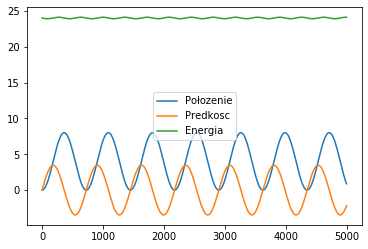

In [29]:
%run hook.py -n=5000 --dt=0.01 --k=3 --x0=4 -m=2 -x=0

### Program implementujący dynamikę dwóch atomów helu w jednym wymiarze wraz z symulacją dynamiki tego układu.

In [30]:
%%writefile lj.py
import numpy as np
import argparse, sys
import matplotlib.pyplot as plt

from integrator1 import SimpleIntegrator, VerletIntegrator
parser = argparse.ArgumentParser(description='Dynamika molekularna jednowymiarowa dwóch atomów helu')

parser.add_argument('-n', '--n', type=int, required=True, help='liczba iteracji')
parser.add_argument('--dt', type=float, required=True, help='krok czasowy')
parser.add_argument('-A', '--A', type=float, required=True, help='parametr A')
parser.add_argument('-B', '--B', type=float, required=True, help='parametr B')
parser.add_argument('-m', '--mass', type=float,  required=True, help='masa atomu helu')
parser.add_argument('-x', '--x', type=float, required=True, help='połozenie poczatkowe atomow')

args = parser.parse_args(sys.argv[1:])

n = args.n
dt = args.dt

A = args.A
B = args.B
x = args.x
m = args.mass

integrator = VerletIntegrator(dt, m, x)

trajectory = []
velocity = []
energy = []

for _ in range(n):
    r = x
    r7 = r**7
    r13 = r**13
    F = 12*A/r13-6*B/r7
    integrator.next(F)
    x = integrator.x
    trajectory.append(x)
    energy.append(B/(r**12) - A/(r**6))
    velocity.append(integrator.v)

plt.plot(range(n), trajectory, range(n), energy)
plt.legend(['Połozenie', 'Energia'])
plt.show()

Writing lj.py


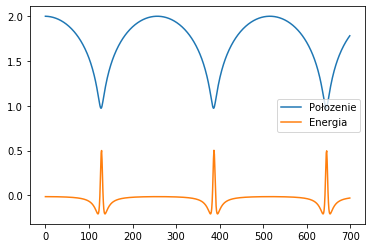

In [31]:
%run lj.py -n=700 --dt 0.1 -m 4 --x 2 -A 1 -B 1.2

### Program implementujący dynamikę cząsteczki dwuatomowej w jednym wymiarze oraz symulacja dynamiki tego układu.

In [32]:
%%writefile two_atoms_molecule.py
import numpy as np
import argparse, sys
import matplotlib.pyplot as plt

from integrator1 import SimpleIntegrator, VerletIntegrator
parser = argparse.ArgumentParser(description='Dynamika molekularna jednowymiarowa cząsteczki dwuatomowej')

parser.add_argument('-n', '--n', type=int, required=True, help='liczba iteracji')
parser.add_argument('--dt', type=float, required=True, help='krok czasowy')
parser.add_argument('-k', '--k', type=float, required=True, help='stała siłowa')
parser.add_argument('-r0', '--r0', type=float, required=True, help='położenie równowagowe')
parser.add_argument('-m', '--mass', type=float,  required=True, help='masa atomu')
parser.add_argument('-x', '--x', type=float, required=True, help='połozenie poczatkowe atomu')

args = parser.parse_args(sys.argv[1:])

n = args.n
dt = args.dt

k = args.k
r0 = args.r0
x = args.x
m = args.mass

integrator = VerletIntegrator(dt, m, x)

trajectory = []
velocity = []
energy = []

for _ in range(n):
    r = x
    F = -k*(r-r0)
    integrator.next(F)
    x = integrator.x
    trajectory.append(x)
    energy.append((k/2)*(r-r0)**2)
    velocity.append(integrator.v)

plt.plot(range(n), trajectory, range(n), energy)
plt.legend(['Połozenie', 'Energia'])
plt.show()

Writing two_atoms_molecule.py


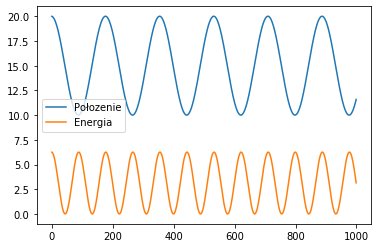

In [33]:
%run two_atoms_molecule.py -n=1000 --dt 0.1 -m 2 --x 20 -k 0.5 -r0=15

### Program implementujący dynamikę rotacji w cząstecze etanu symulacja tego układu.

In [34]:
%%writefile etane_torsion_angle.py
import numpy as np
import argparse, sys
import matplotlib.pyplot as plt

from integrator1 import SimpleIntegrator, VerletIntegrator
parser = argparse.ArgumentParser(description='Dynamika molekularna jednowymiarowa rotacji cząsteczki')

parser.add_argument('-n', '--n', type=int, required=True, help='liczba iteracji')
parser.add_argument('--dt', type=float, required=True, help='krok czasowy')
parser.add_argument('-k0', '--k0', type=float, required=True, help='równowagowy kąt torsyjny')
parser.add_argument('-A', '--A',type=float, required=True, help='wysokość bariery rotacyjnej')
parser.add_argument('-m', '--m',type=float, required=True, help='krotność kąta równowagowego')
parser.add_argument('-x', '--x',type=float, required=True, help='kąt początkowy')

args = parser.parse_args(sys.argv[1:])

n = args.n
dt = args.dt

k0 = np.deg2rad(args.k0)
A = args.A
m = args.m
x = np.deg2rad(args.x)

integrator = VerletIntegrator(dt, m, x)

trajectory = []
energy = []

for _ in range(n):
    F = -m*A*np.sin(k0-m*x)
    integrator.next(F)
    x = integrator.x
    trajectory.append(np.rad2deg(x))
    energy.append(A*(1+np.cos(m*x-k0)))

plt.plot(range(n), trajectory, range(n), energy)
plt.legend(['Połozenie', 'Energia'])
plt.show()


Writing etane_torsion_angle.py


#### Przykłady dla różnych kątów początkowych

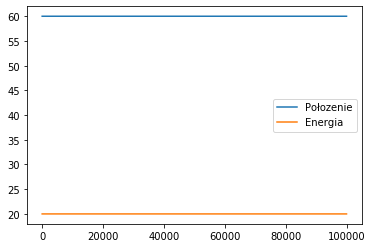

In [35]:
%run etane_torsion_angle.py -n 100000 --dt 0.001 -k0 180 -A 10 -m 3 -x 60

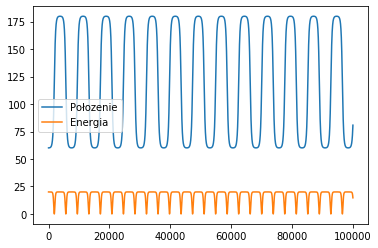

In [36]:
%run etane_torsion_angle.py -n 100000 --dt 0.001 -k0 180 -A 10 -m 3 -x 60.1

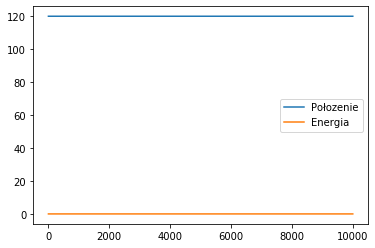

In [37]:
%run etane_torsion_angle.py -n 10000 --dt 0.001 -k0 180 -A 1 -m 3 -x 120

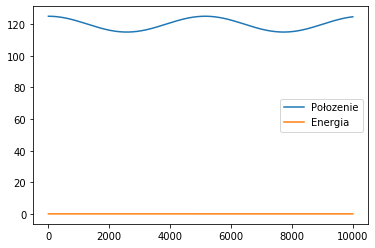

In [38]:
%run etane_torsion_angle.py -n 10000 --dt 0.001 -k0 180 -A 1 -m 3 -x 125

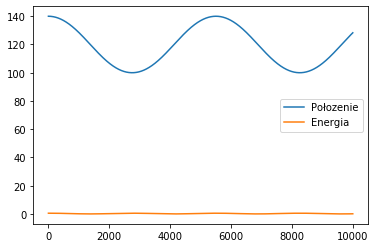

In [39]:
%run etane_torsion_angle.py -n 10000 --dt 0.001 -k0 180 -A 1 -m 3 -x 140

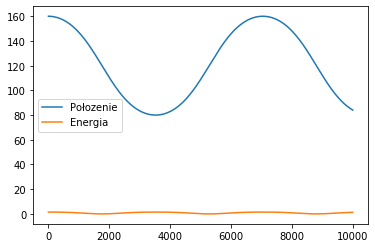

In [40]:
%run etane_torsion_angle.py -n 10000 --dt 0.001 -k0 180 -A 1 -m 3 -x 160

#### Wykres zależności energi potencjalnej od kąta torsyjnego w cząsteczce etanu - do analizy z powyższymi wykresami 

In [41]:
%%writefile etane_torsion_angle_add.py

import argparse
import sys
import numpy as np
import matplotlib.pyplot as plt

parser = argparse.ArgumentParser(description='Dynamika molekularna rotacji cząsteczki etanu')

parser.add_argument('-k0', '--k0', type=float, required=True, help='równowagowy kąt torsyjny')
parser.add_argument('-A', '--A',type=float, required=True, help='wysokość bariery rotacyjnej')
parser.add_argument('-n', '--n',type=float, required=True, help='krotność kąta równowagowego')

args = parser.parse_args(sys.argv[1:])

k0 = args.k0
A = args.A
n = args.n

x = np.linspace(0,360,360)
y = A*(1+np.cos(n*np.deg2rad(x)-np.deg2rad(k0)))

plt.plot(x,y)
plt.show()


Writing etane_torsion_angle_add.py


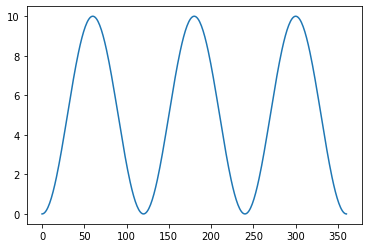

In [42]:
%run etane_torsion_angle_add.py -k0 180 -A 5 -n 3


### Całkowanie w przestrzeni trójwymiarowej

In [43]:
%%writefile integrator_3d.py
import numpy as np

class Integrator:
    def __init__(self, dt, m, x):
        self.m = m
        self.x = x
        self.dt = dt

class SimpleIntegrator(Integrator):
    def __init__(self, dt, m, x):
        super().__init__(dt, m, x)
        self.v = np.zeros_like(x)

    def next(self, F):
        x = self.x
        a = np.empty_like(F)
        for i in range(F.shape[1]):
            a[:, i] = F[:, i] / self.m[i]
        self.x = self.x + self.v * self.dt + 0.5 * a * self.dt**2
        self.v = self.v + 0.5 * a * self.dt

class VerletIntegrator(Integrator):
    def __init__(self, dt, m, x):
        super().__init__(dt, m, x)
        self._prev_x = x

    def next(self, F):
        x = self.x
        a = np.empty_like(F)
        for i in range(F.shape[1]):
            a[:, i] = F[:, i] / self.m[i]
        self.x = 2 * self.x - self._prev_x + 0.5 * a * self.dt**2
        self.v = (self.x - self._prev_x) / (2 * self.dt)
        self._prev_x = x

Writing integrator_3d.py


### Implementacja dynamiki molekularnej czasteczki dwuatomowej w przestrzeniu trójwymiarowej

In [44]:
%%writefile bond3d.py
import argparse
import sys
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la

from integrator_3d import VerletIntegrator

parser = argparse.ArgumentParser(description='Czasteczka dwuatomowa')

parser.add_argument('-n', '--n', type=int, required=True, help='liczba iteracji')
parser.add_argument('--dt', type=float, required=True, help='krok czasowy')
parser.add_argument('-k', '--k', type=float, required=True, help='stała siłowa')
parser.add_argument('--r0', type=float, required=True, help='odległosc równowagowa')
parser.add_argument('-m', '--mass', type=float, nargs=2, required=True, help='masy atomów')
parser.add_argument('-x', '--x', type=float, nargs=6, required=True, help='połozenia poczatkowe atomów')

args = parser.parse_args(sys.argv[1:])

n = args.n
dt = args.dt

k = args.k
r0 = args.r0

m = np.array(args.mass)
x = np.empty([3, 2])
x[:, 0] = np.array(args.x[0:3])
x[:, 1] = np.array(args.x[3:6])

integrator = VerletIntegrator(dt, m, x)

trajectory = []

for _ in range(n):
    u = x[:, 1] - x[:, 0]
    r = la.norm(u)
    F = np.empty([3, 2])
    F[:, 0] = k * (r - r0) * u / r
    F[:, 1] = -k * (r - r0)* u / r
    integrator.next(F)
    x = integrator.x
    trajectory.append(r)

plt.plot(range(n), trajectory)
plt.legend(['Odległosc'])
plt.show()

Writing bond3d.py


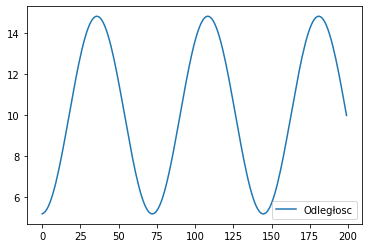

In [45]:
%run bond3d.py -n 200 --dt 0.1 -k 1 --r0 10 -m 2 1 -x 2 3 4 5 6 7

### Implementacja dynamiki molekularnej dwóch atomów w potencjale Lennarda-Jonesa w przestrzeniu trójwymiarowej

In [46]:
%%writefile lj3d.py
import argparse
import math
import sys
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
from integrator_3d import VerletIntegrator

parser = argparse.ArgumentParser(
description='Dynamika molekularna w potencjale LJ')

parser.add_argument('-n', '--n', type=int,required=True, help='liczba iteracji')
parser.add_argument('--dt', type=float, required=True, help='krok czasowy')
parser.add_argument('-A', '--A', type=float,required=True, help='parametr A')
parser.add_argument('-B', '--B', type=float, required=True, help='parametr B')
parser.add_argument('-m', '--mass', type=float, nargs=2,required=True, help='masy atomów')
parser.add_argument('-x', '--x', type=float, nargs=6,required=True, help='połozenia poczatkowe atomów')

args = parser.parse_args(sys.argv[1:])

n = args.n
dt = args.dt

A = args.A
B = args.B

m = np.array(args.mass)
x = np.empty([3, 2])
x[:, 0] = np.array(args.x[0:3])
x[:, 1] = np.array(args.x[3:6])

integrator = VerletIntegrator(dt, m, x)

trajectory = []

for _ in range(n):
    u = x[:, 1] - x[:, 0]
    r2 = np.dot(u, u)
    r6 = r2**3
    r8 = r6 * r2
    r14 = r8 * r6
    F = np.empty([3, 2])
    F[:, 0] = -(12 * A / r14 - 6 * B / r8) * u
    F[:, 1] = (12 * A / r14 - 6 * B / r8) * u
    integrator.next(F)
    x = integrator.x
    
    trajectory.append(math.sqrt(r2))

plt.plot(range(n), trajectory)
plt.legend(['Odległosc'])
plt.show()

Writing lj3d.py


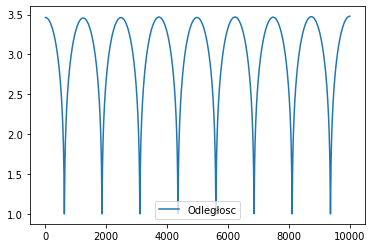

In [47]:
%run lj3d.py -n 10000 --dt 0.1 -A 1 -B 1 -m 2 2 -x 2 3 4 4 5 6